In [1]:
import pandas as pd

In [2]:
groceries = []

In [3]:
with open ("C:/Users/gaurisonawane/Downloads/book.csv") as f:
    groceries =f.read()

In [5]:
groceries = groceries.split("\n")

In [7]:
groceries

['citrus fruit,semi-finished bread,margarine,ready soups',
 'tropical fruit,yogurt,coffee',
 'whole milk',
 'pip fruit,yogurt,cream cheese ,meat spreads',
 'other vegetables,whole milk,condensed milk,long life bakery product',
 'whole milk,butter,yogurt,rice,abrasive cleaner',
 'rolls/buns',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)',
 'pot plants',
 'whole milk,cereals',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes',
 'beef',
 'frankfurter,rolls/buns,soda',
 'chicken,tropical fruit',
 'butter,sugar,fruit/vegetable juice,newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk,pastry',
 'whole milk',
 'tropical fruit,cream cheese ,processed cheese,detergent,newspapers',
 'tropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,sal

In [8]:
groceries_list = []

In [9]:
for i in groceries:
    groceries_list.append(i.split(","))

In [10]:
groceries_list

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [11]:
all_groceries_list = [i for item in groceries_list for i in item]

In [13]:
from collections import Counter

In [14]:
item_frequencies = Counter(all_groceries_list)

In [15]:
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])

In [17]:
frequencies = list(reversed([i[1] for i in item_frequencies]))

In [18]:
items = list(reversed([i[0] for i in item_frequencies]))

In [19]:
import matplotlib.pyplot as plt

<ipython-input-29-6a2e3aeae67e>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0,11)),height = frequencies[0:11],color='rgbkymc');


Text(0, 0.5, 'Count')

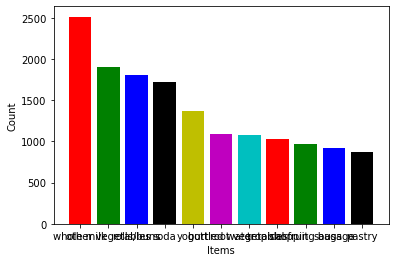

In [29]:
plt.bar(x = list(range(0,11)),height = frequencies[0:11],color='rgbkymc');
plt.xticks(list(range(0,11)), items[0:11]);
plt.xlabel("Items");
plt.ylabel("Count")

In [30]:
groceries_series = pd.DataFrame(pd.Series(groceries_list))

In [32]:
groceries_series = groceries_series.iloc[:9835,:]

In [35]:
groceries_series.columns = ["Transactions"]

In [36]:
X = groceries_series['Transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [37]:
from mlxtend.frequent_patterns import apriori,association_rules

In [39]:
import numpy as np
frequent_itemsets = apriori(X, min_support=0.005, max_len=3, use_colnames=True)

In [40]:
frequent_itemsets.sort_values('support', ascending=False, inplace=True)

<ipython-input-41-56e62275740d>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)), height = frequent_itemsets.support[1:11], color='rgmyk');


Text(0, 0.5, 'Support')

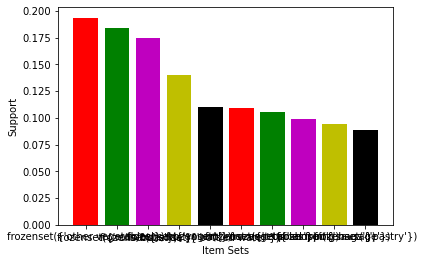

In [41]:
plt.bar(x = list(range(1,11)), height = frequent_itemsets.support[1:11], color='rgmyk');
plt.xticks(list(range(1,11)), frequent_itemsets.itemsets[1:11]);
plt.xlabel('Item Sets');
plt.ylabel('Support')

In [42]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold=1)

In [44]:
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
6,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
7,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
8,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
9,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693


In [45]:
rules.sort_values('lift', ascending=False, inplace=True)

In [46]:
def to_list(i):
    return (sorted(list(i)))

In [49]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [50]:
ma_X = ma_X.apply(sorted)

In [51]:
rules_sets = list(ma_X)

In [52]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [53]:
index_rules =[]

In [54]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [55]:
rules_no_redudancy = rules.iloc[index_rules, :]

In [56]:
rules_no_redudancy.sort_values('lift', ascending =False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2023,(whipped/sour cream),"(other vegetables, butter)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2042,"(other vegetables, root vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2204,"(pip fruit, citrus fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
776,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1469,"(whole milk, whipped/sour cream)",(butter),0.032232,0.055414,0.006711,0.208202,3.757185,0.004925,1.192963
2436,(yogurt),"(tropical fruit, curd)",0.139502,0.010269,0.005287,0.037901,3.690645,0.003855,1.028720
1043,(root vegetables),"(other vegetables, beef)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197
1870,"(domestic eggs, whole milk)",(butter),0.029995,0.055414,0.005999,0.200000,3.609174,0.004337,1.180732
